<a href="https://colab.research.google.com/github/BhavyaGoyal777/computeTasks/blob/main/EDA_of_task3ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df=pd.read_csv("data2.csv",skiprows=[8223])
new_df=pd.read_csv("data2.csv",skiprows=[8223])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32560, 15)

In [5]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()




age                  0
workclass         1835
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1842
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.582217,1.897834e+05,10.080682,1077.681941,87.306511,40.438084
std,13.640253,1.055476e+05,2.572760,7385.403083,402.966116,12.347099
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = ['sex', 'race','income']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid the dummy variable trap


In [8]:
encoded_columns = encoder.fit_transform(df[columns_to_encode])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop the original columns and concatenate the encoded columns
new_df.drop(columns=columns_to_encode, inplace=True)
new_df = pd.concat([df, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
df.drop(columns=['fnlwgt'],inplace=True)

In [10]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


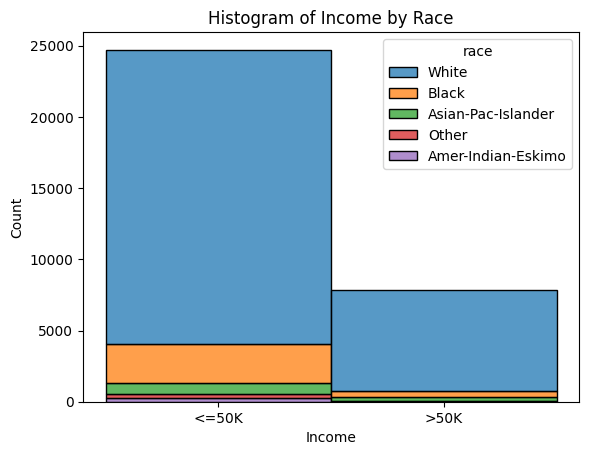

In [11]:
sns.histplot(data=df, x='income', hue='race', multiple='stack')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by Race')
plt.show()

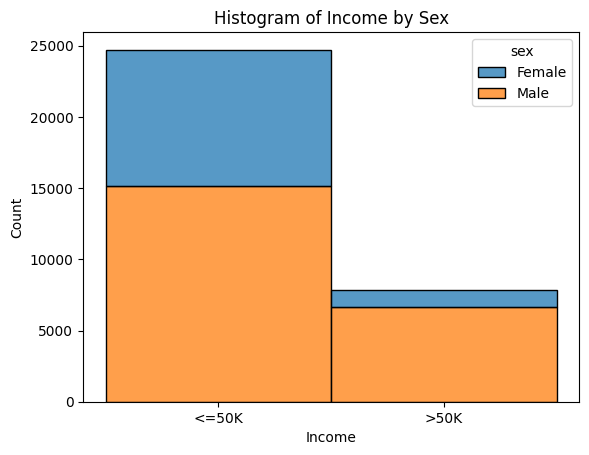

In [12]:
sns.histplot(data=df, x='income', hue='sex', multiple='stack')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by Sex')
plt.show()

In [13]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


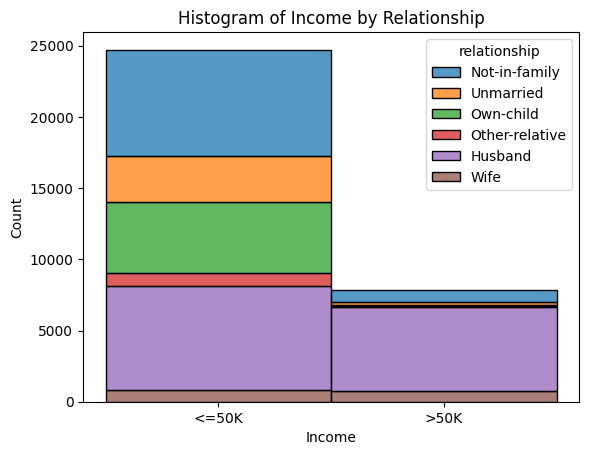

In [16]:
sns.histplot(data=df, x='income', hue='relationship', multiple='stack')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by Relationship')
plt.show()

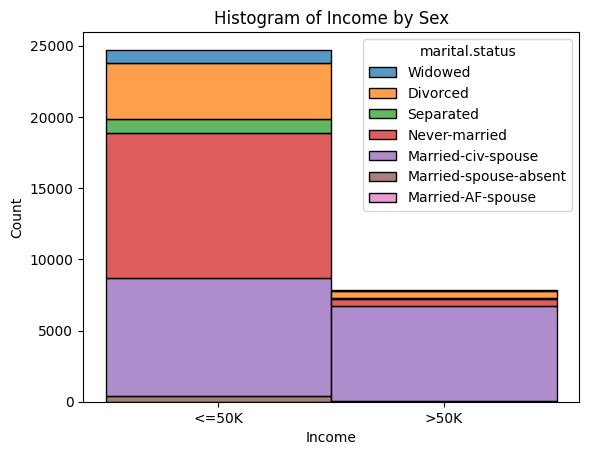

In [17]:
sns.histplot(data=df, x='income', hue='marital.status', multiple='stack')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by Sex')
plt.show()

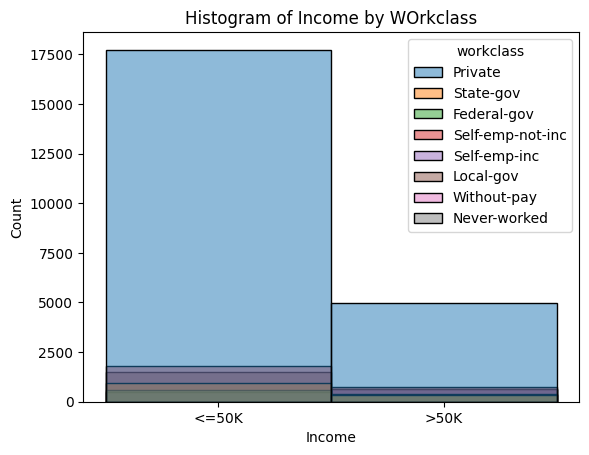

In [19]:
sns.histplot(data=df, x='income', hue='workclass')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by WOrkclass')
plt.show()

In [20]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


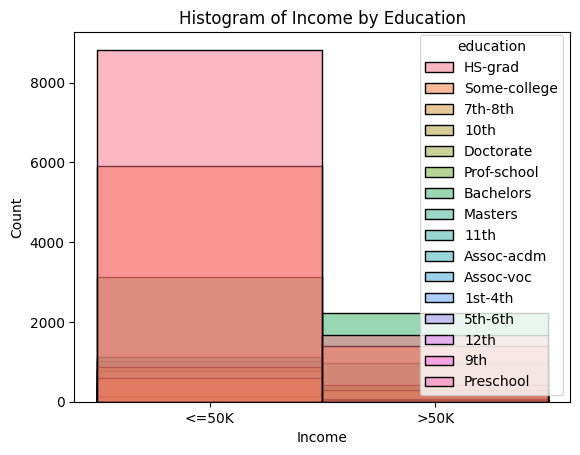

In [21]:
sns.histplot(data=df, x='income', hue='education')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by Education')
plt.show()

In [22]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


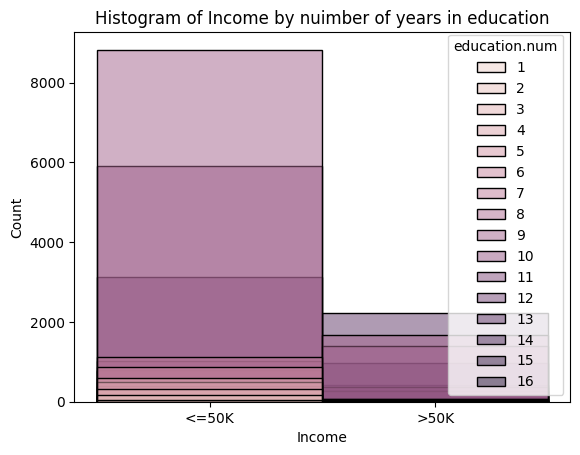

In [23]:
sns.histplot(data=df, x='income', hue='education.num')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by nuimber of years in education')
plt.show()

In [24]:
df.isnull().sum()

age                  0
workclass         1835
education            0
education.num        0
marital.status       0
occupation        1842
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [25]:
one_hot_encoded_column=['race','sex','income']
df.head()


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32560 non-null  object
 3   education.num   32560 non-null  int64 
 4   marital.status  32560 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital.gain    32560 non-null  int64 
 10  capital.loss    32560 non-null  int64 
 11  hours.per.week  32560 non-null  int64 
 12  native.country  31977 non-null  object
 13  income          32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [27]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
df['sex']=df['sex'].map({'Male': 1,'Female': 0})
df.head()



,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


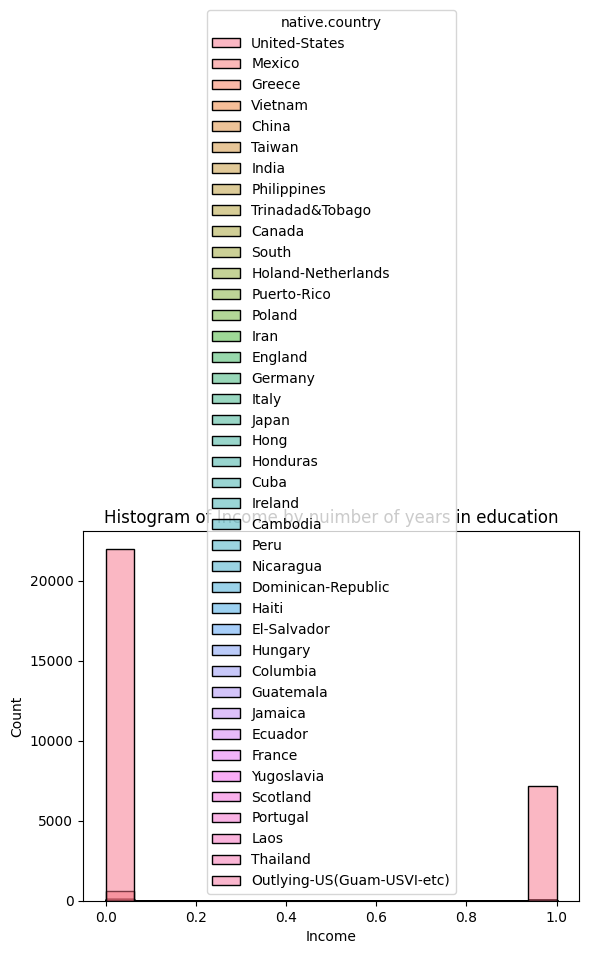

In [28]:
sns.histplot(data=df, x='income', hue='native.country')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income by nuimber of years in education')
plt.show()

In [29]:
print(df['native.country'].value_counts())
df["native.country"] = df["native.country"].fillna("United-States")
df.head()




native.country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


In [30]:
numeric_features = ['age','education.num','capital.gain','capital.loss','hours.per.week','income']
df[numeric_features].corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.036527,0.077671,0.057767,0.068691,0.234021
education.num,0.036527,1.000000,0.122630,0.079923,0.148127,0.335155
capital.gain,0.077671,0.122630,1.000000,-0.031616,0.078405,0.223327
capital.loss,0.057767,0.079923,-0.031616,1.000000,0.054248,0.150523
hours.per.week,0.068691,0.148127,0.078405,0.054248,1.000000,0.229671
income,0.234021,0.335155,0.223327,0.150523,0.229671,1.000000


In [31]:
print(df['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [32]:
print(df['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [33]:
df.duplicated().sum()


3533

In [34]:
df.drop_duplicates(inplace=True)
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


In [35]:
df.duplicated().sum()


0

In [36]:
another_df=df


In [37]:
another_df.isnull().sum()

age                  0
workclass         1629
education            0
education.num        0
marital.status       0
occupation        1636
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [38]:
another_df=another_df.dropna()
another_df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [39]:
another_df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,1,0,0,11,Taiwan,0
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,40,United-States,1
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0


<ipython-input-40-b1122c426664>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="relationship",y="income",data=another_df,kind="bar",


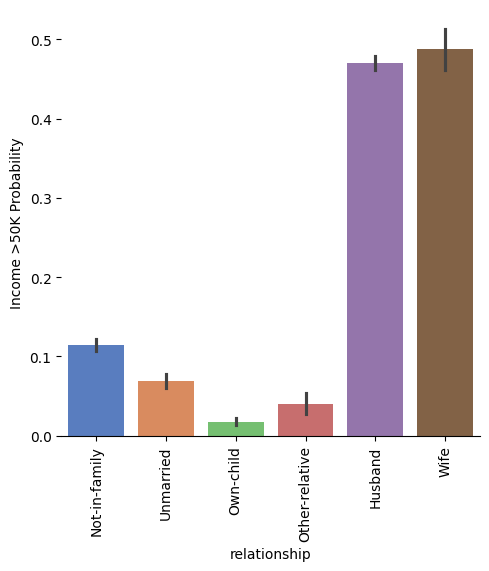

In [40]:
g = sns.catplot(x="relationship",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g


<ipython-input-41-f0cf20b37bc8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="marital.status",y="income",data=another_df,kind="bar",


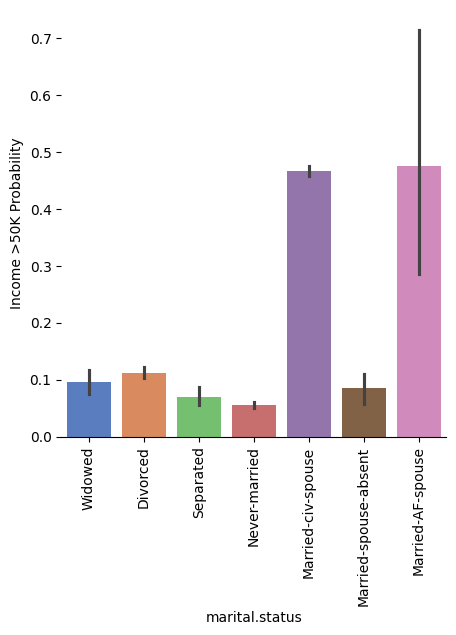

In [41]:
g = sns.catplot(x="marital.status",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g


In [42]:
another_df["marital.status"] =another_df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
another_df["marital.status"] = another_df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
another_df["marital.status"] = another_df["marital.status"].map({"Married":1, "Single":0})
another_df["marital.status"] = another_df["marital.status"].astype(int)

<ipython-input-42-463ac0db4d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  another_df["marital.status"] =another_df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
<ipython-input-42-463ac0db4d34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  another_df["marital.status"] = another_df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
<ipython-input-42-463ac0db4d34>:3: SettingWithCopyWarning: 
A value is try

In [43]:
another_df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,0,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
3,54,Private,7th-8th,4,0,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,Some-college,10,0,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
5,34,Private,HS-grad,9,0,Other-service,Unmarried,White,0,0,3770,45,United-States,0
6,38,Private,10th,6,0,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,Masters,14,0,Tech-support,Not-in-family,Asian-Pac-Islander,1,0,0,11,Taiwan,0
32554,53,Private,Masters,14,1,Exec-managerial,Husband,White,1,0,0,40,United-States,1
32555,22,Private,Some-college,10,0,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
32556,27,Private,Assoc-acdm,12,1,Tech-support,Wife,White,0,0,0,38,United-States,0


<ipython-input-44-a441e7c214e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="education",y="income",data=another_df,kind="bar",


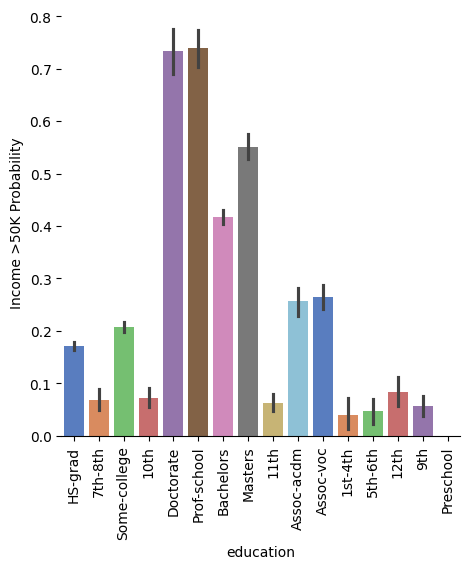

In [44]:
g = sns.catplot(x="education",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g


<ipython-input-45-a839f8254612>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="education.num",y="income",data=another_df,kind="bar",


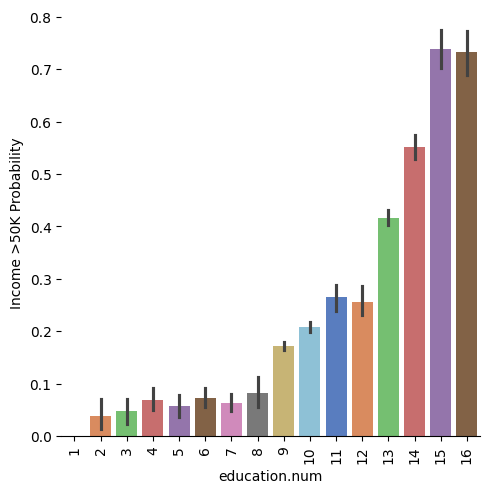

In [45]:
g = sns.catplot(x="education.num",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g

<ipython-input-46-a839f8254612>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="education.num",y="income",data=another_df,kind="bar",


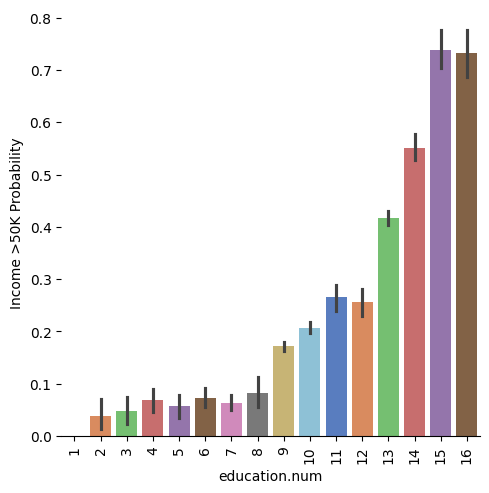

In [46]:
g = sns.catplot(x="education.num",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g

<ipython-input-47-a441e7c214e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="education",y="income",data=another_df,kind="bar",


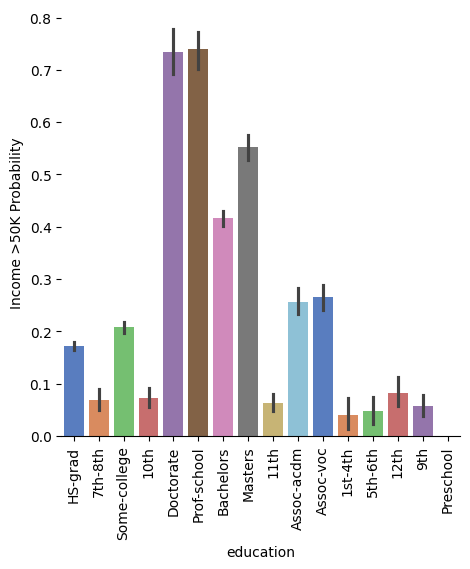

In [47]:
g = sns.catplot(x="education",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g


In [48]:
another_df['education'].isnull().sum()

0

In [49]:
print(another_df['education'].value_counts().sum())
another_df['education'].isnull().sum()

27391


0

In [50]:
another_df['capital.gain'].value_counts()

capital.gain
0        24816
15024      337
7688       274
7298       242
99999      154
         ...  
6097         1
1639         1
7978         1
2387         1
22040        1
Name: count, Length: 118, dtype: int64

In [51]:
another_df['capital.loss'].value_counts()

capital.loss
0       25938
1902      199
1977      165
1887      155
1848       49
        ...  
1844        1
2201        1
1944        1
1411        1
4356        1
Name: count, Length: 90, dtype: int64

In [52]:
another_df['relationship']
another_df['relationship'].isnull().sum()

0

In [53]:
another_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,0,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
3,54,Private,7th-8th,4,0,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,Some-college,10,0,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
5,34,Private,HS-grad,9,0,Other-service,Unmarried,White,0,0,3770,45,United-States,0
6,38,Private,10th,6,0,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0


<ipython-input-54-8a6f796b5b0a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="workclass",y="income",data=another_df,kind="bar",


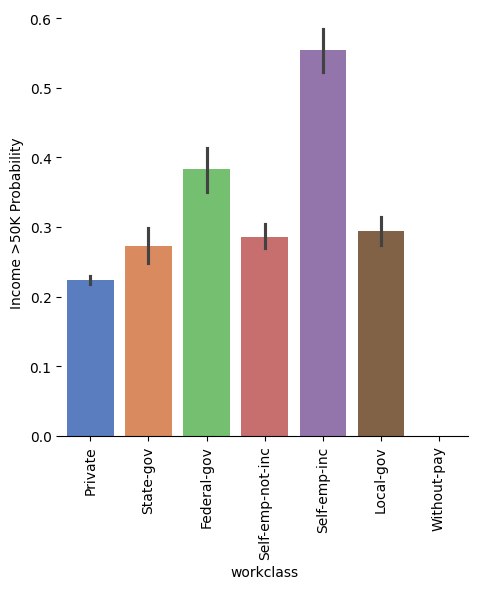

In [54]:
g = sns.catplot(x="workclass",y="income",data=another_df,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
g


In [55]:
import pandas as pd



# Define the mapping
label_mapping = {
    'Self-emp-not-inc':1
    ,'Private':0,'Local-gov':0,'State-gov':0,'Federal-gov':0,'Self-emp-inc':0,'Without-pay':0,'Never-worked':0





}

# Apply the mapping to the column
df['education.num_mapped'] = df['workclass'].map(label_mapping)
df['education.num_mapped'].value_counts()

another_df['workclass']=df['education.num_mapped']


<ipython-input-55-6672444e30d9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  another_df['workclass']=df['education.num_mapped']


In [56]:
another_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,0.0,HS-grad,9,0,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
3,54,0.0,7th-8th,4,0,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,0.0,Some-college,10,0,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
5,34,0.0,HS-grad,9,0,Other-service,Unmarried,White,0,0,3770,45,United-States,0
6,38,0.0,10th,6,0,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0


In [57]:
Y=another_df['income']
X=another_df.iloc[:,:12]
X.isnull().sum()


age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [58]:
X.head()
another_df=another_df.drop(columns=['native.country','race','occupation'])
Y=another_df['income']
X=another_df.iloc[:,:12]
